In [1]:
#%matplotlib inline
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

#  <font color='green'> Première partie : Arbres de décision
Dans cette première partie du TP, nous allons exploiter la base de données "Iris de Fisher" accessible via sklearn. 
Cette base fait appel à une variété de fleurs. Iris Fisher Database : https://en.wikipedia.org/wiki/Iris_flower_data_set


##  <font color='blue'> Etape 1 : Visualiser la base "Iris de Fisher"

- Déterminer les attributs, les classes et le nombre d'échantillons par classe
- Quel type de données vous aurez à manipuler ?
- Qu'observez-vous sur les attributs en termes de séparabilité des classes ?

In [2]:
from sklearn.datasets import load_iris

# Reading the Iris.csv file
iris = load_iris()

# Print the label of species (classes)
print(iris.target_names)

# Print the names of the available features
print(iris.feature_names)

# Examples in each class 
print("Number of samples per class: %s" % np.bincount(iris.target))

# Print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of samples per class: [50 50 50]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# Create a DataFrame of the iris dataset
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
#data.head(150)[::3]
# NB : (0:setosa, 1:versicolor, 2:virginica)

In [4]:
## Descriptive analysis of the database

# Extract Attributes / Features
X = iris.data

# Extract Target / Class Labels
y = iris.target

#Some statistics on the data
data.describe()


,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


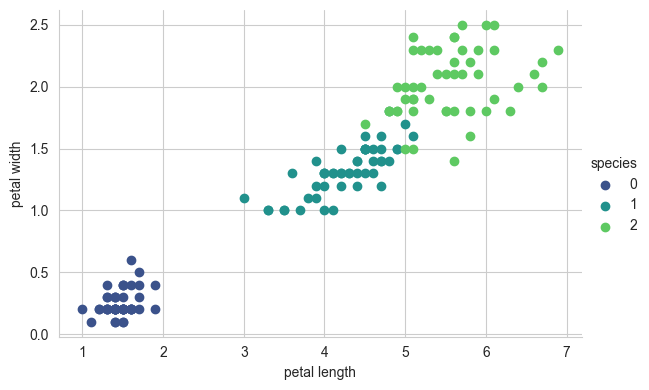

In [5]:
# Visualize the relashionship between two attributes

#(0:setosa, 1:versicolor, 2:virginica)
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='species', palette="viridis", height=4, aspect=1.5)\
   .map(plt.scatter,'petal length','petal width')\
   .add_legend()
plt.show()


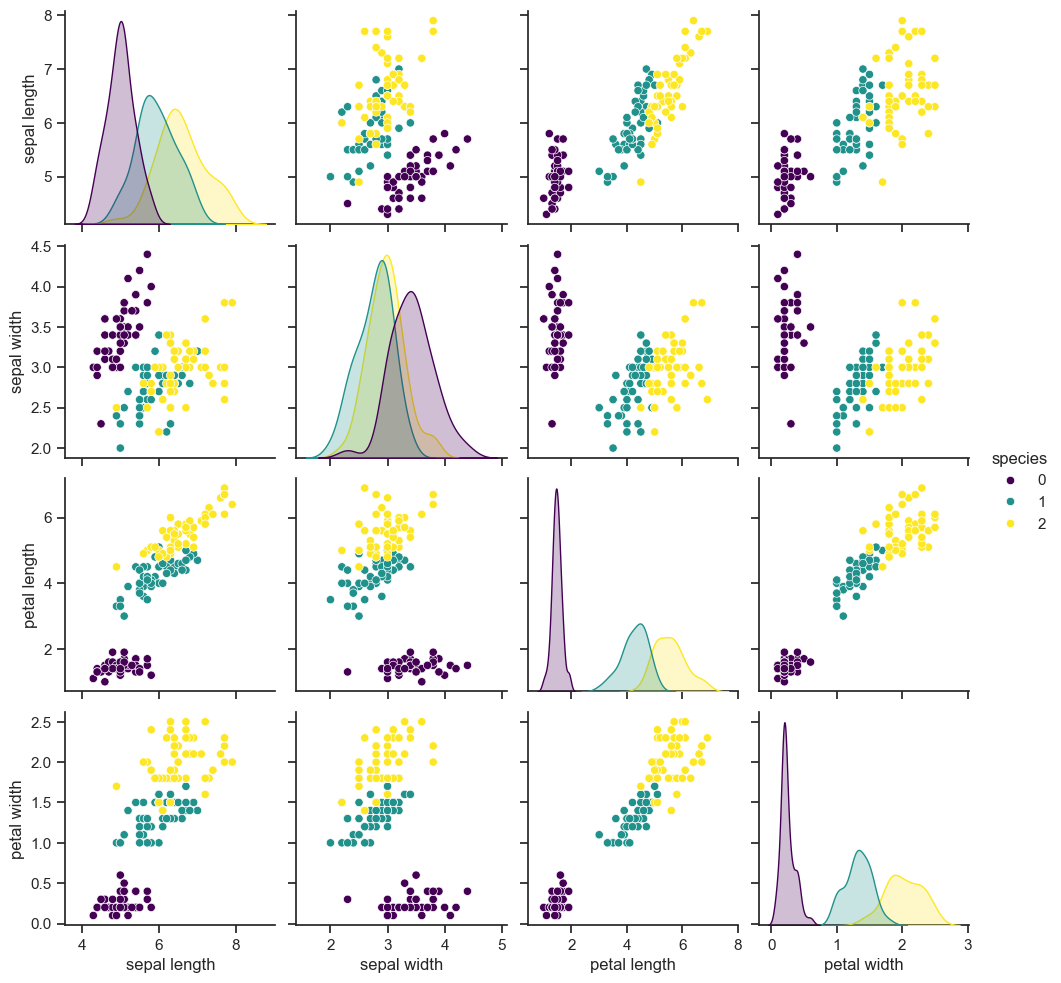

In [23]:
# Plot all pairs of attributes
sns.set(style="ticks", color_codes=False)
g=sns.pairplot(data, hue='species', palette="viridis")



#   <font color='blue'>Etape 2. Classification supervisée avec les Arbres de Décision

### Objectif :
(i) Appliquer les arbres de décision sur cette base de données d'iris pour une classification multi-classes;

(ii) Etudier l'impact des hyperparamètres sur les performances du classifieur. 

Pour cela :

### 1. Construire un arbre de décision sur une base d'apprentissage (prendre 70% des exemples), en utilisant les hyperparamètres "par défaut"
- Interpréter finement l'arbre de décision obtenu, et cela à chaque profondeur.
- Que peut-on déduire sur la qualité de l'arbre ?
- Utiliser l'arbre pour la prédiction de 4 fleurs (test). Montrer le processus de classification à travers les différentes couches de l'arbre (le chemin de décision)

### Construction de l'arbre

[Ellipsis]

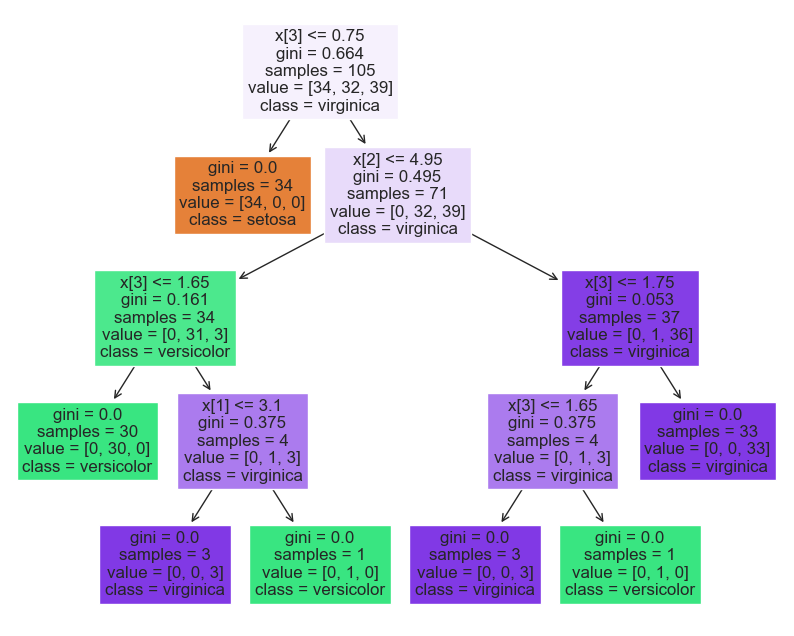

In [7]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Create Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) #70% training and 30% test

# Create Decision Tree Classifier on the training dataset
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the tree after training
plt.figure(figsize=(10,8)) 
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]

### Utiliser l'arbre pour l'inférence / la prédiction

In [8]:
from sklearn.metrics import accuracy_score

# Predict Accuracy Score on test dataset
y_pred = clf.predict(X_test)

print("Train data accuracy:",round(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)),3),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")

Train data accuracy: 100.0 %
Test data accuracy: 97.778 %


In [9]:
# Classification of four new iris flowers

idx1 = clf.predict([[5, 3, 1.4, 0.2]])[0]
print("Flower 1:", iris.target_names[idx1])

species_idx2 = clf.predict([[3, 5, 4, 2]])[0]
print("Flower 2:", iris.target_names[species_idx2])

species_idx3 = clf.predict([[6, 2, 0.4, 1.2]])[0]
print("Flower 3:", iris.target_names[species_idx3])

species_idx4 = clf.predict([[6, 2, 0.4, 3]])[0]
print("Flower 4:", iris.target_names[species_idx4])


Flower 1: setosa
Flower 2: versicolor
Flower 3: versicolor
Flower 4: virginica


In [10]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



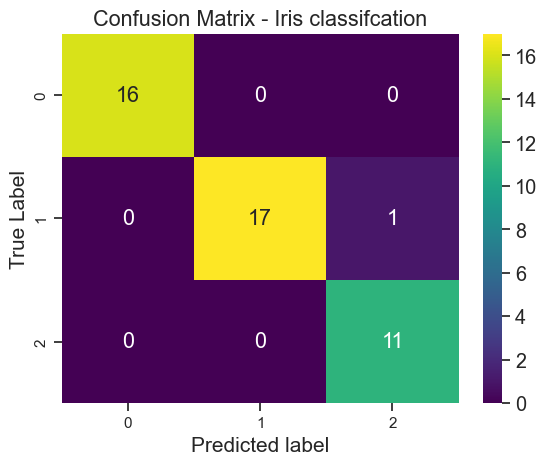

In [11]:
from sklearn import metrics
# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred) # Turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix) # Plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis") # Set axis titles
ax.set_title('Confusion Matrix - Iris classifcation')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15) 

plt.show()


### Construire l'arbre de décision en fixant certains hyperparamètres

- Appliquer différentes valeurs aux hyperparamètres de l'arbre : "max_depth", "min_samples_split", "criterion", etc. Puis, analyser leur impact sur les performances. Se référer à : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Etudier l'impact de la prise en compte de 80%, 70%, 50% et 20% des données en apprentissage.

Train data accuracy: 98.095 %
Test data accuracy: 97.778 %


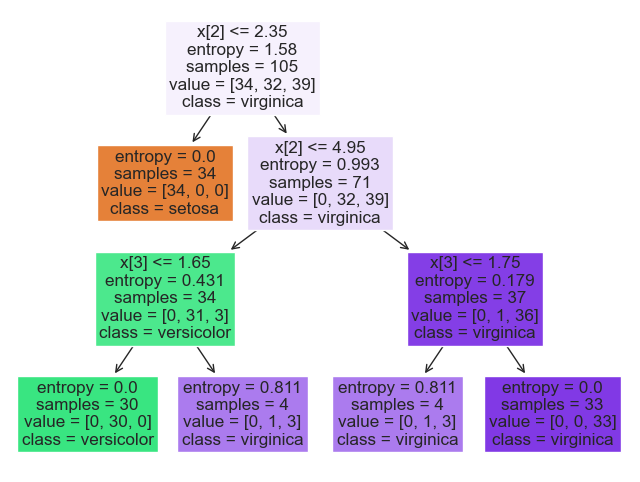

In [22]:
# You can change the size of the training dataset 80%, 70%, 50%, 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test

# Create Decision Tree Classifier by specifying some parametrs
clf = tree.DecisionTreeClassifier(max_depth = 3, criterion="entropy", min_samples_split=5)
#clf = tree.DecisionTreeClassifier(max_leaf_nodes=2,max_depth = 3,min_samples_leaf = 20, criterion="entropy", min_samples_split = 20)
clf.fit(X_train, y_train)

# Visualize the tree after training
plt.figure(figsize=(8,6))
tree.plot_tree(clf, class_names=iris.target_names, filled=True)
[...]
# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")


In [13]:
# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = y_test, y_pred=y_pred)),"%")


Train data accuracy: 98.095 %
Test data accuracy: 97.778 %


In [14]:
from sklearn.model_selection import GridSearchCV

N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    
pgrid = {"max_depth": [1, 5, 10, 20, 25, 30, 35],
        "min_samples_split": [2, 5, 10, 15, 20]}
accuracies.append(clf.score(X_test,y_test))
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_depth: " + str(grid_search.best_estimator_.max_depth))
print("min_samples_split: " + str(grid_search.best_estimator_.min_samples_split))

Meilleur score : 0.9777777777777777
max_depth: 10
min_samples_split: 5





#   <font color='blue'>Etape 3. Vers la détection du diabète 

## Classification binaire avec les arbres de décision

Dans cette deuxième partie du TP, nous allons exploiter aussi la base de données traitant de la problématique de la détection du diabete, en traitant la base de données accessible via "diabetes.csv". 

- Décrire la base de données. 
- Présenter la méthodologie d'utilisation de l'arbre de décision dans ce problème de classification.
- Interpréter les résultats.


In [15]:
dataset = pd.read_csv("diabetes.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
dataset.sample(5, random_state=101)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
748,3,187,70,22,200,36.4,0.408,36,1
42,7,106,92,18,0,22.7,0.235,48,0
485,0,135,68,42,250,42.3,0.365,24,1
543,4,84,90,23,56,39.5,0.159,25,0


In [17]:
Xdiab = dataset.drop(columns='Outcome')
ydiab = dataset['Outcome']

Xdiab_train, Xdiab_test, ydiab_train, ydiab_test = train_test_split(Xdiab, ydiab, test_size=0.3, random_state=0)

clfdiab = tree.DecisionTreeClassifier()
clfdiab.fit(Xdiab_train, ydiab_train)

ydiab_pred = clfdiab.predict(Xdiab_test)

print("Train data accuracy:","%.3f" %(100*accuracy_score(y_true = ydiab_train, y_pred=clfdiab.predict(Xdiab_train))),"%")
print("Test data accuracy:","%.3f" %(100*accuracy_score(y_true = ydiab_test, y_pred=ydiab_pred)),"%")

Train data accuracy: 100.000 %
Test data accuracy: 74.026 %


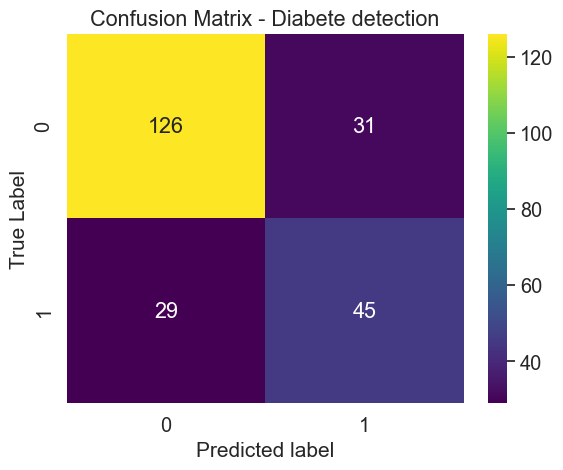

In [18]:
conf_matrix = metrics.confusion_matrix(ydiab_test, ydiab_pred)
#conf_matrix
matrix_df = pd.DataFrame(conf_matrix) # Plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis") # Set axis titles
ax.set_title('Confusion Matrix - Diabete detection')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15) 

plt.show()
